In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
! kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

100% 609M/612M [00:05<00:00, 140MB/s]
100% 612M/612M [00:05<00:00, 121MB/s]


In [ ]:
! unzip gtsrb-german-traffic-sign


In [ ]:
import os
import random

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

import tensorflow as tf
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
from sklearn.model_selection import train_test_split


In [ ]:
def createDataAndLabels(path):
  imgs_path = path
  data_list = []
  labels_list = []
  numClasses = 43
  for i in range(numClasses):
      i_path = os.path.join(imgs_path, str(i)) #0-42
      for img in os.listdir(i_path):
          im = Image.open(i_path +'/'+ img)
          im = im.resize((30,30))
          im = np.array(im)
          im = im.astype('float')

          data_list.append(im)
          labels_list.append(i)
  data = np.array(data_list)
  labels = np.array(labels_list)
  return data, labels
  print("Done")
data, labels = createDataAndLabels("Train")


labal: 12


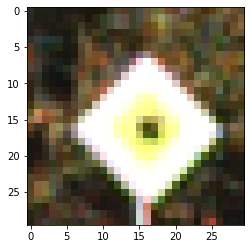

In [ ]:
RND = np.random.randint(1, len(data))
img = data[RND]

print("labal: "+ str(labels[RND]))
plt.imshow(img.astype('uint8'))
plt.show()

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(data, labels, test_size= 0.1, random_state=10)
print("training_shape: ", x_train.shape,y_train.shape)
print("testing_shape: ", x_test.shape,y_test.shape)

#reduce channels from 3 to 1
x_train = np.sum(x_train/3, axis=3, keepdims = True)
x_test =  np.sum(x_test/3, axis=3, keepdims = True)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,)

datagen.fit(x_train, augment=True, seed=1)



print("\ntraining_shape: ", x_train.shape,y_train.shape)
print("testing_shape: ", x_test.shape,y_test.shape)
y_train = tf.one_hot(y_train,43)
y_test = tf.one_hot(y_test,43)

training_shape:  (35288, 30, 30, 3) (35288,)
testing_shape:  (3921, 30, 30, 3) (3921,)

training_shape:  (35288, 30, 30, 1) (35288,)
testing_shape:  (3921, 30, 30, 1) (3921,)


In [ ]:
model = tf.keras.Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape= (30, 30, 1)))
model.add((Conv2D(filters=32, kernel_size=(5,5), activation="relu")))

# model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(2,return_sequences=False, dropout=0.25, 
# recurrent_dropout=0.1)))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add((Conv2D(filters=64,kernel_size=(3,3),activation="relu"))) 

model.add((MaxPool2D(pool_size=(2,2))))

model.add(Dropout(rate=0.25))


model.add(Flatten()) 
model.add(Dense(256, activation="relu"))

model.add(Dropout(rate=0.40))

model.add(Dense(43, activation="softmax")) 

model.build((None, 30, 30, 1)) # `input_shape` is the shape of the input data
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_211 (ModuleWr (None, 26, 26, 32)        832       
_________________________________________________________________
module_wrapper_212 (ModuleWr (None, 22, 22, 32)        25632     
_________________________________________________________________
module_wrapper_213 (ModuleWr (None, 11, 11, 32)        0         
_________________________________________________________________
module_wrapper_214 (ModuleWr (None, 11, 11, 32)        0         
_________________________________________________________________
module_wrapper_215 (ModuleWr (None, 9, 9, 64)          18496     
_________________________________________________________________
module_wrapper_216 (ModuleWr (None, 4, 4, 64)          0         
_________________________________________________________________
module_wrapper_217 (ModuleWr (None, 4, 4, 64)        

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
epochs = 5
history = model.fit(x_train, y_train, epochs=epochs,batch_size=64, validation_data=(x_train, y_train))


Epoch 1/5
552/552 [==============================] - 154s 279ms/step - loss: 0.7512 - accuracy: 0.7945 - val_loss: 0.2223 - val_accuracy: 0.9562
Epoch 2/5
552/552 [==============================] - 153s 277ms/step - loss: 0.4716 - accuracy: 0.8676 - val_loss: 0.1329 - val_accuracy: 0.9719
Epoch 3/5
552/552 [==============================] - 150s 272ms/step - loss: 0.3558 - accuracy: 0.8993 - val_loss: 0.1025 - val_accuracy: 0.9787
Epoch 4/5
552/552 [==============================] - 150s 272ms/step - loss: 0.2995 - accuracy: 0.9123 - val_loss: 0.0868 - val_accuracy: 0.9786
Epoch 5/5
552/552 [==============================] - 150s 272ms/step - loss: 0.2747 - accuracy: 0.9207 - val_loss: 0.0593 - val_accuracy: 0.9884


In [ ]:
score = model.evaluate(x_train, y_train)
print('Train Accuracy: {}'.format(score[1]))

score = model.evaluate(x_test, y_test)
print('Test Accuracy: {}'.format(score[1]))

1103/1103 [==============================] - 32s 29ms/step - loss: 0.0593 - accuracy: 0.9884
Train Accuracy: 0.9883813261985779
123/123 [==============================] - 4s 33ms/step - loss: 0.0726 - accuracy: 0.9855
Test Accuracy: 0.9854629039764404
